In [16]:
import pandas as pd

Import Section

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os


Read All Csv

In [25]:

customers = pd.read_csv("../dataset/olist_customers_dataset.csv")
orders = pd.read_csv("../dataset/olist_orders_dataset.csv")
order_items = pd.read_csv("../dataset/olist_order_items_dataset.csv")
products = pd.read_csv("../dataset/olist_products_dataset.csv")
payments = pd.read_csv("../dataset/olist_order_payments_dataset.csv")


1. Customers


In [35]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [36]:
customers.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [38]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [39]:
customers.duplicated().sum()    

np.int64(0)

In [40]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [42]:
customers.shape

(99441, 5)

<Axes: >

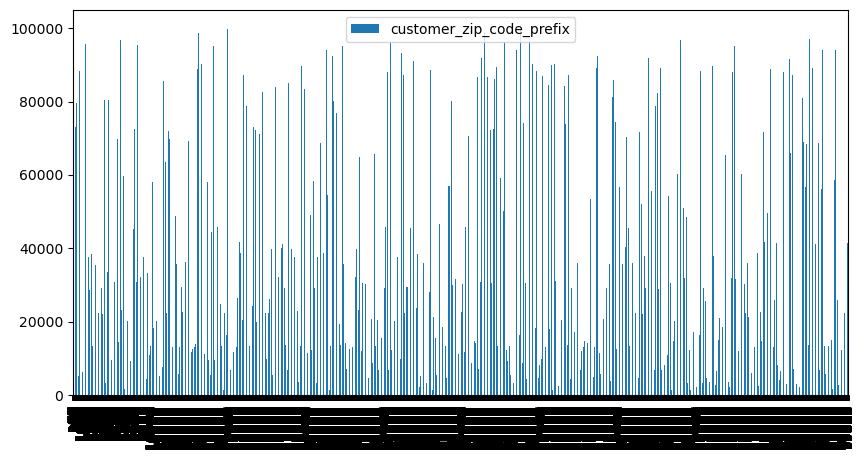

In [44]:
customers.plot(kind='bar', figsize=(10, 5))

In [26]:
df = orders.merge(customers, on='customer_id', how='left') \
          .merge(order_items, on='order_id', how='left') \
            .merge(products, on='product_id', how='left') \
            .merge(payments, on='order_id', how='left')


In [27]:
df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
         'order_estimated_delivery_date', 'customer_zip_code_prefix',
         'customer_city', 'customer_state', 'shipping_limit_date',
         'product_name_lenght', 'product_description_lenght',
         'product_photos_qty', 'product_weight_g', 'product_length_cm',
         'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

In [28]:
df.dropna(inplace=True)

In [32]:
customer_df = df.groupby('customer_unique_id').agg({
    'payment_value': ['sum', 'mean'],
    'product_id': 'count',
    'product_category_name': pd.Series.nunique
}).reset_index()

In [33]:
customer_df.columns = ['customer_id','total_spent','avg_spent','total_orders','unique_categories']

In [34]:
output_path = "../dataset/processed_customer_data.csv"
customer_df.to_csv(output_path, index=False)